In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [68]:
# Función que soluciona ecuaciones diferenciales usando el método Runge-Kutta de quinto orden
def runge_kutta_5(f, y0, t0, tf, h):
    t = np.arange(t0, tf + h, h)
    n = len(t)
    y  = np.zeros(n)
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k5 = np.zeros(n)
    k6 = np.zeros(n)
    
    y[0] = y0
    for i in range(n - 1):
        k1[i] = f(t[i], y[i])
        k2[i] = f(t[i] + h/4, y[i] + k1[i]*h/4)
        k3[i] = f(t[i] + h/4, y[i] + k1[i]*h/8 + k2[i]*h/8)
        k4[i] = f(t[i] + h/2, y[i] - k2[i]*h/2 + k3[i]*h)
        k5[i] = f(t[i] + 3*h/4, y[i] + 3*k1[i]*h/16 + 9*k4[i]*h/16)
        k6[i] = f(t[i] + h, y[i] - 3*k1[i]*h/7 + 2*k2[i]*h/7 + 12*k3[i]*h/7 - 12*k4[i]*h/7 + 8*k5[i]*h/7)
        y[i+1] = y[i] + h/90*(7*k1[i] + 32*k3[i] + 12* k4[i] + 32*k5[i] + 7*k6[i])
        
    return y , t

# 1.

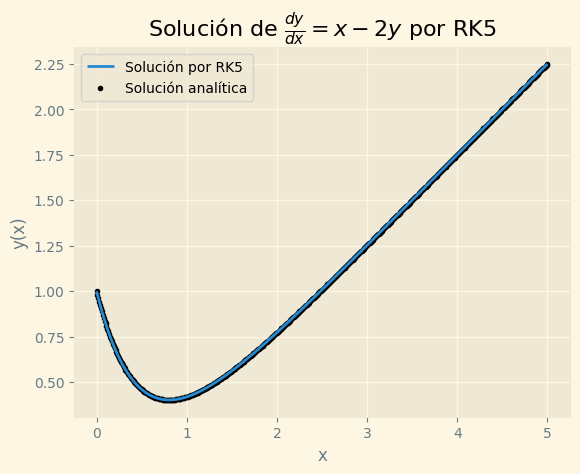

In [103]:
# Solución por RK5
def f1(t, y):
    return t - 2*y

y,x = runge_kutta_5(f1, 1, 0, 5, 0.01)

# Solución analítica
def solf1(x):
    return 1/4 * (2*x + 5*np.exp(-2*x)-1)

# Gráfica
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots()
ax.plot(x, y, label = 'Solución por RK5')
ax.scatter(x, solf1(x), label = 'Solución analítica', marker = '.', color = 'black')

ax.set_xlabel(r'x')
ax.set_ylabel(r'y(x)')
ax.set_title(r'Solución de $\frac{dy}{dx}=x-2y$ por RK5')
ax.legend()
plt.show()

# 2.

In [80]:
# Funciones anidadas para resolver con diferentes valores de alpha
def solve_RK(f, y0, t0, tf, h):
    def RK(alpha):
        def funcion_alpha(t, y):
            return f(t, y, alpha)
        
        t, y = runge_kutta_5(funcion_alpha, y0, t0, tf, h)
        
        return t, y
    
    return RK


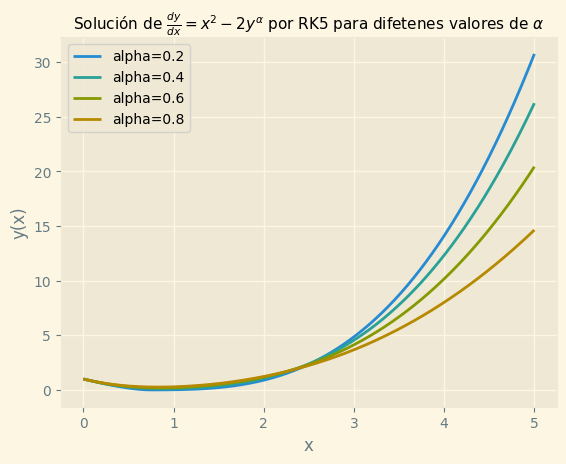

In [102]:
# Función para resolver la ecuación diferencial
def f2(t, y, alpha):
    return np.power(t, 2) - 2*np.power(y, alpha)

# Valores de alpha
alphas = [0.2, 0.4, 0.6, 0.8]

#Solución
RK_Solution = solve_RK(f2, 1, 0, 5, 0.01)

#Gráfica
fig, ax = plt.subplots()

for alpha in alphas:
  y, t = RK_Solution(alpha)
  plt.plot(t, y, label = f'alpha={alpha}')

ax.set_xlabel(r'x')
ax.set_ylabel(r'y(x)')
ax.set_title(r'Solución de $\frac{dy}{dx}=x^2-2y^{\alpha}$ por RK5 para difetenes valores de $\alpha$', fontsize = '11')
ax.legend()
plt.show()